<a href="https://colab.research.google.com/github/CodeMosaic7/Parkinson-Multimodal-Detection/blob/main/ParkinsonsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CASE STUDY ON PARKINSON**
Parkinson’s disease (PD), or simply Parkinson’s, is a long-term degenerative disorder of the central nervous system that mainly affects the motor system. The symptoms usually emerge slowly, and as the disease worsens, non-motor symptoms become more common. The most obvious early symptoms are tremor, rigidity, slowness of movement, and difficulty with walking.

Parkinson’s Disease can cause slow motor movements, depression, anxiety, sleep and sensory system disorders, behaviour changes etc. Environmental factors and Genetic Inheritance are amongst the major contributing factors for Parkinson’s disease.

###**PARKINSON'S DISEASE ANALYSIS**
Symtoms of Parkinson:

Tremors in the hands, arms, legs, jaw, and face
Stiffness in the arms, legs, and trunk
Slowness of movement
Poor balance and coordination
Difficulty walking and talking
Mental and behavioral changes
Sleep problems
Depression
Memory difficulties
Fatigue


A new Parkinson's test can identify people with Parkinson's disease during the early stages or even before symptoms begin. The test is called an alpha-synuclein seed amplification assay.

Here, I will try to recognize this risks of a person suffering from parkinson based on 3 parameters:
1. Voice -(Sound Analysis)
2. Drawing Analysis- (CNN)
3. simple past history data.
4. MRI Analysis

So this is a multimodal approch to recognize whether a person is suffering from parkinson or not.

Voice Features → Dense → Dropout →

                                   \

                                    → Concatenate → Dense → Output

                                    /
Image (spiral) → CNN → Flatten →

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models, layers
import opencv as cv2

### **Importing dataset 1**
This dataset contains voice based observations of patients.

In [ ]:
df1=pd.read_csv("ParkinsonDiseaseVoiceData.csv")
df1.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Data preprocessing


In [ ]:
df1 = df1.sample(frac=1).reset_index(drop=True)

In [ ]:
x=df1.drop(["name","status"], axis=1) #removing non-numeric rows from the data
y=df1["status"] #dependent variable

In [ ]:
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,223.361,263.872,87.638,0.00352,0.00002,0.00169,0.00188,0.00506,0.02536,0.225,...,0.01909,0.04137,0.01493,20.366,0.566849,0.574282,-5.456811,0.345238,2.840556,0.232861
1,176.858,205.560,75.344,0.00747,0.00004,0.00418,0.00420,0.01254,0.04795,0.435,...,0.03510,0.08037,0.05470,13.893,0.556494,0.729586,-5.288912,0.343073,3.099301,0.242119
2,198.383,215.203,193.104,0.00212,0.00001,0.00113,0.00135,0.00339,0.01263,0.111,...,0.00951,0.01919,0.00119,30.775,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
3,91.904,115.871,86.292,0.00540,0.00006,0.00281,0.00336,0.00844,0.02752,0.249,...,0.02214,0.04272,0.01141,21.414,0.583390,0.792520,-4.960234,0.363566,2.642476,0.275931
4,108.807,134.656,102.874,0.00761,0.00007,0.00349,0.00486,0.01046,0.02719,0.255,...,0.02067,0.04450,0.01036,21.028,0.536009,0.819032,-4.649573,0.205558,1.986899,0.316700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,201.464,210.565,195.708,0.00198,0.00001,0.00105,0.00115,0.00314,0.01194,0.107,...,0.00957,0.01758,0.00135,31.732,0.344252,0.742737,-7.777685,0.170183,2.447064,0.057610
191,117.226,123.925,106.656,0.00417,0.00004,0.00186,0.00270,0.00558,0.01909,0.171,...,0.01949,0.02592,0.00955,23.079,0.603515,0.669565,-5.619070,0.191576,2.027228,0.215724
192,110.739,113.597,100.139,0.00356,0.00003,0.00170,0.00200,0.00510,0.01484,0.133,...,0.01285,0.02261,0.00430,26.550,0.369090,0.776158,-6.085567,0.192375,1.889002,0.174152
193,142.729,162.408,65.476,0.00831,0.00006,0.00469,0.00419,0.01407,0.03485,0.365,...,0.02949,0.05605,0.02599,20.264,0.489345,0.730387,-5.720868,0.158830,2.277927,0.180828


In [ ]:
y

,status
0,1
1,1
2,0
3,1
4,1
...,...
190,0
191,0
192,0
193,1


In [ ]:
sns.countplot()

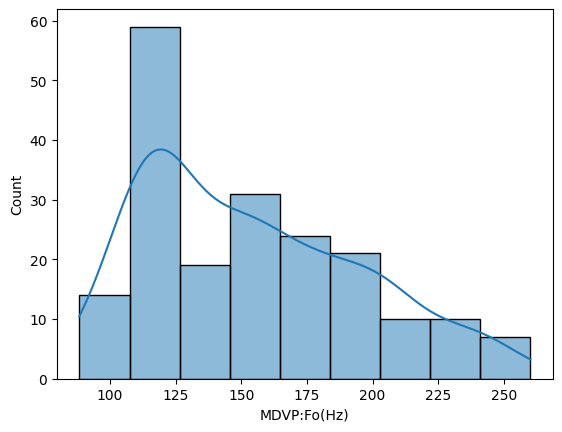

In [ ]:
sns.histplot(df1['MDVP:Fo(Hz)'], kde=True)
plt.show()

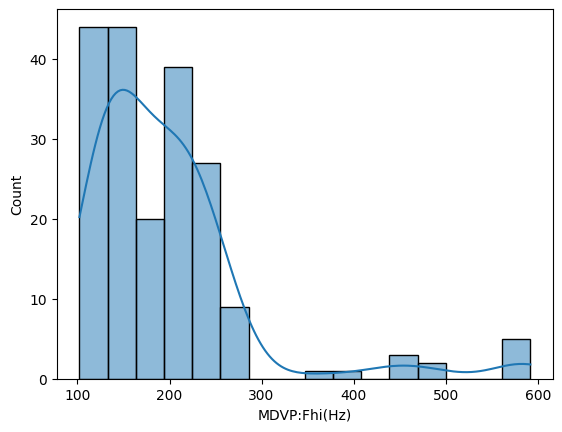

In [ ]:
sns.histplot(df1['MDVP:Fhi(Hz)'], kde=True)
plt.show()

Since, I planning to work with deep learning models, using standard scaler.

In [ ]:
sc=StandardScaler()
x=sc.fit_transform(x)

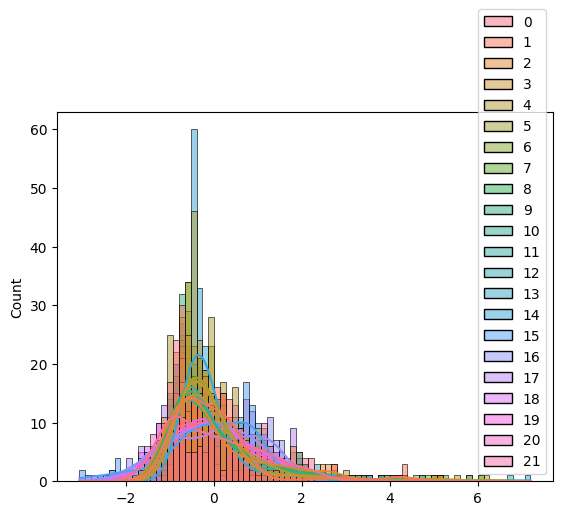

In [ ]:
sns.histplot(x, kde=True)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Building simple ANN model.

In [ ]:
model=models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=16)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6788 - loss: 0.5827 - val_accuracy: 0.6923 - val_loss: 0.5798
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7056 - loss: 0.5169 - val_accuracy: 0.7949 - val_loss: 0.5320
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7976 - loss: 0.4755 - val_accuracy: 0.7949 - val_loss: 0.4992
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8158 - loss: 0.4123 - val_accuracy: 0.8462 - val_loss: 0.4722
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8187 - loss: 0.3986 - val_accuracy: 0.8718 - val_loss: 0.4509
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8250 - loss: 0.3762 - val_accuracy: 0.8974 - val_loss: 0.4337
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8476 - loss: 0.3641 - val_accuracy: 0.8974 - val_loss: 0.4156
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8445 - loss: 0.3221 - val_accuracy: 0.9

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.0303
Test Accuracy: 1.00


### **Importing Dataset 2**
This dataset contains images of drawing of suspected patients.


smart watch data
https://physionet.org/content/?topic=parkinsons

In [2]:
!pip install kagglehub


In [4]:
import kagglehub
path = kagglehub.dataset_download("kmader/parkinsons-drawings")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/parkinsons-drawings


### **Importing Dataset 3**

In [ ]:
def load_image(folder, image_id, size=(128, 128)):
    path = os.path.join(folder, f"{image_id}.png")
    if os.path.exists(path):
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, size)
        return img / 255.0
    return np.zeros(size)

spiral_images = []

### **Importing Dataset 4**

smart watch data
https://physionet.org/content/?topic=parkinsons


Parkinson’s disease (PD) is the second-most common neurodegenerative disorder, while incidence and worldwide burden are further increasing. In the era of digital health transformation, smart devices and mobile sensors, including smartphones and smartwatches, can provide an affordable source to capture and analyse digital objective biomarkers. These can aid in early diagnosis and studying phenotypical characteristics. The Parkinson’s Disease Smartwatch (PADS) dataset comprises clinical assessments of a broad spectrum of PD patients, other similar movement disorders and healthy controls. The assessments were recorded using a smart-device-based system consisting of two smartwatches and one smartphone. The two smartwatches were worn on each of the patient’s wrists and their sensors synchronously recorded 11 interactive movement tasks that were designed by expert neurologists to provoke subtle changes in movement pathologies. In total, 5159 measurement steps of 469 individuals were captured. The PADS dataset includes all acceleration and rotation sensor signals, as well as details on movement steps, demographics, medical history, and PD-specific non-motor symptoms. We believe that our extensively annotated dataset provides a well-suited data foundation for the training, validation, and optimisation of future technology- and sensor-driven systems for movement disorders.

The dataset comprises 469 individual participants that are numbered from 1 to 469, assigning each sample a unique identifier. The two data modalities recorded in our study (questionnaire and movement data) are organised in separate folders. One JSON file is stored per id and modality.
movement/observation_001.json: The file holds all relevant meta information and links to the smartwatch records of the movement tasks for participant 001. The format is oriented at the proposed Time Series Data Format (TSDF) from Claes et al. [4]. The smartwatches recorded acceleration (in g) and rotation (in rad/s) data with a sampling rate of 100 Hz. The channel encodes the sensor and the axis. All individual records are listed under "session" and reference the .txt file that holds the time series data. For each record, the entry "rows" defines how many sample points are stored in the referenced .txt file. Further, each recorded channel and it's corresponding unit are named. An excerpt of the JSON file can be seen below: